# Lecture 20-21: Hypothesis Testing, Part 2


This notebook reviews the elements of hypothesis testing process. 

**Helpful Resource:**
- [Python Reference](http://data8.org/sp22/python-reference.html): Cheat sheet of helpful array & table methods used in Data 8!

**Recommended Readings**: 
- [Testing Hypotheses](https://inferentialthinking.com/chapters/11/Testing_Hypotheses.html)
- [p-Value](https://inferentialthinking.com/chapters/11/3/Decisions_and_Uncertainty.html)
- [A/B Testing](https://inferentialthinking.com/chapters/12/1/AB_Testing.html)

In [8]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

### Null and Alternative Hypotheses

All statistical tests attempt to choose between two views of the world. Specifically, the choice is between two views about how the data were generated. These two views are called hypotheses.

The `null hypothesis` says that the data were generated at random under clearly specified assumptions about the randomness. From a practical perspective, the null hypothesis is a hypothesis under which you can simulate data. The `alternative hypothesis` says that some reason other than chance made the data differ from the predictions of the model in the null hypothesis.

Identify the Null and Alternative hypotheses, as well as the test statistic in the following scenarios. 

a) A study was conducted to see if a new Covid-19 vaccine reduces the risk of contracting the virus. Assume the risk of contracting Covid-19 without vaccine was 20% in the target population. 

b) During the 2010 World Cup tournament, Paul the Octopus (in a German aquarium) became famous for correctly predicting the winner in all 8 games it was asked to predict.  (Two containers of food were lowered into Paul’s tank, each with a flag of the opposing teams.  He made a selection by choosing which container to eat from. Is this evidence that Paul has psychic powers and can choose correctly more than half the time?

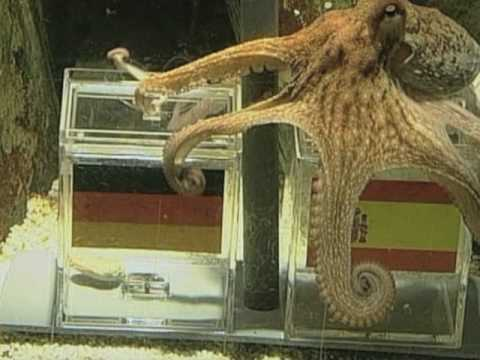

In [6]:
from IPython.display import YouTubeVideo
YouTubeVideo("pc0FLC8H7D8")

c) In an experiment, students were given words to memorize, then were randomly assigned to either take a 90 minute nap or take a caffeine pill.  A couple hours later, they were tested on their recall ability.  We wish to test to see if the sample provides evidence that there is a difference in mean number of words people can recall depending on whether they take a nap or have some caffeine.  



d) At a small college, the percent of students who major in STEM, business and behavioal sciences were 12%, 40% and 48%, respectively. A student delegate is made of 2 STEM students, 10 business majors and 25 behavioral science majors. Does the student delegate representative of the student population at the college? 

### Errors in Decisions

For the scenario (a) in the problem above, discuss what wrong conclusions (decisions error) are possible. You may refer to Section 11.4 of the textbook: [Error Probabilities](https://inferentialthinking.com/chapters/11/4/Error_Probabilities.html) for a review. This [web applet](https://www.geogebra.org/m/ce66mcqb) illustrates the two types of errors that occur in vaccine trials. 


In [1]:
from datascience import *
Table.read_table('decision_errors.csv')

Unnamed: 0,Test Favors the Null,Test Favors the Alternative
Null is True,Correct result,Error
Alternative is True,Error,Correct result


645.8

### Finding P-value from Sampling Distributions

In the experiment (c) mentioned above, the test statistic was set to be the difference in the mean number of words recalled by people who take a nap ($\bar{x}_1$) and the ones by those who took a caffeine pill ($\bar{x}_2$). Similar to the example used in the A/B testing lecture, here the null hypothesis assumes that the two groups have the same population mean. 

<img src="two_means_diff_1000samples.GIF" alt="drawing" width="600"/>


What is the P-value if the observed difference in the original sample is 3.5 words? 

What is the P-value if the observed difference in the original sample is 3.0 words? 

The following sampling distribution shows the empirical distribution of Total Variation Distance generated from the null hypothesis from experiment (d) above. What is the p-value if the student delegate is made of 2 STEM students, 10 business majors and 25 behavioral science majors? 

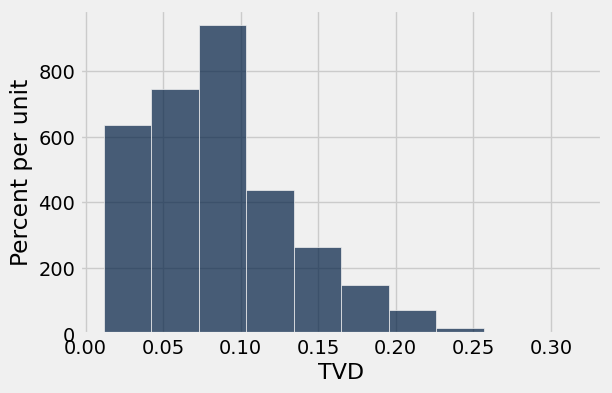

In [10]:
data = make_array(2, 10, 25)
size = np.sum(data)

def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

null_model = make_array(0.12, 0.4, 0.48)

results = make_array()
for i in np.arange(10000):
    test_stat = tvd(sample_proportions(size, null_model), null_model)
    results = np.append(results, test_stat)
Table().with_column('TVD', results).hist()


### Shuffling Labels for Categorical Data: Comparing Two Proportions

The following data records an experiment on whether Lithium was effective in preventing cocaine users from relapsing. In the column labeled "Result", 1 represents relapse (returning to cocaine use), and 0 presents no relapse. 

In [12]:
coke = Table().read_table('cocaine_lithium.csv')
coke.pivot('Result', 'Group')

Group,0,1
Lithium,10,14
Placebo,7,20


In the lecture, the following `distance` function was used to calculate the absolute value of the difference in proportions of relapses between the two groups. Based on values shown in the pivot table shown above, can you write an arithmetic expression that generates the same output as the `distance` function? 

In [ ]:
def distance(table, group_label):
    reduced = table.select('Result', group_label)
    proportions = reduced.group(group_label, np.average).column(1)
    print(proportions)
    return abs(proportions.item(1) - proportions.item(0))

distance(coke, 'Group')

In [ ]:
# your expression that uses the values in the pivot table to generate the same number as above




Why does the use of ```np.average``` result in the proportions of relapses among the subjects? 

The code below uses a similar technique as in Lecture 20: Causality to determine to shuffle the labels under "Group" to produce another sample under the null hypothesis (Lithium and Placebo has the same rate of relapse). Run the code a few times and describe what happens after each shuffle. 

In [ ]:
def one_shuffle(table):
    shuffled_labels = table.sample(with_replacement = False).column('Group')
    shuffled_table = table.select('Group', 'Result').with_column(
        'Shuffled', shuffled_labels)
    return shuffled_table

coke_shuffled = one_shuffle(coke)
coke_shuffled.pivot('Result','Shuffled')

Now run the `distance` function again on the shuffled list, and verify that your expression above again produces the same output. 

In [ ]:
def distance(table, group_label):
    reduced = table.select('Result', group_label)
    proportions = reduced.group(group_label, np.average).column(1)
    return abs(proportions.item(1) - proportions.item(0))

distance(coke_shuffled, 'Shuffled')

In [2]:
# test your expression here to see if it results in the same value 


Here we will proceed to simulate 1000 values of the test statistic based on the `distance` function defined above. 

In [ ]:
stats = make_array()

for i in np.arange(1000):
    stats = np.append(stats, distance(one_shuffle(coke), 'Shuffled'))

Table().with_column('Test statistic', stats).hist()

Idenfify on the graph which areas correspond to the p-value. Then write a single line of code the evaluates this p-value. 

What should be the conclusion of this test? If you were a doctor, would you recommend the Lithium treatment to your patients? 

### Real World Example #1: Deflategate 

The Deflategate scandal was a National Football League (NFL) controversy in the United States involving the allegation that New England Patriots quarterback Tom Brady ordered the deliberate deflation of footballs that were used in the Patriots' victory against the Indianapolis Colts during the 2014 AFC Championship Game on January 18, 2015. 

In [14]:
deflate = Table.read_table('deflate.csv')
deflate

Team,Combined,Pressure Drop
Patriots,11.65,0.85
Patriots,11.025,1.475
Patriots,11.325,1.175
Patriots,10.85,1.65
Patriots,11.275,1.225
Patriots,11.775,0.725
Patriots,12.075,0.425
Patriots,11.325,1.175
Patriots,11.15,1.35
Patriots,10.7,1.8


The drop in pressure for each football is the difference between the starting pressure and the combined pressure measurement by two referees. It looks as though the Patriots’ drops were larger than the Colts’. Use the same random shuffling strategy as in the A/B test to conduct a hypothesis test for the theory that Patriot's pressure drops were on average larger than the Colts'. 

### Real World Example #2: Mendel's Peas

The way in which traits are passed from one generation to the next-and sometimes skip generations-was first explained by Gregor Mendel. By experimenting with pea plant breeding, Mendel developed three principles of inheritance that described the transmission of genetic traits, before anyone knew genes existed. Mendel's insight greatly expanded the understanding of genetic inheritance, and led to the development of new experimental methods.

Part of Mendel's experiment produced the following data after crossing plants with different characteristics: 
- 315 plants with round, yellow seeds
- 108 plants with round, green seeds
- 101 plants with wrinkled, yellow seeds
- 32 plants with wrinkled, green seeds

Mendel's predicted that ratio of Rounded to Wrinkled peas should be 3:1, and the Yellow to Green peas should also be 3:1. Can you conduct a hypothesis test to check whether Mendel's data is consistent with his theory? Use the TVD as a test statistic. 

